# **Financial Analytics** : *Stock Analysis*

## *Installing datareader and yfinance*

In [ ]:

!pip install pandas-datareader --upgrade

In [ ]:
!pip install yfinance --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50


## *Importing Libraries*

In [ ]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
plt.style.use("fivethirtyeight")

In [ ]:
## Creating an array of symbols of required stocks
stocksymbols = ["META", "AMZN", "AAPL", "NFLX", "GOOG","HUDCO.BO"]

In [ ]:
stockstartdate= "2017-05-19" ## I choose this date as HUDCO was listed in BSE on 19th May,2017
today= datetime.today().strftime("%Y-%m-%d")
today

'2024-12-30'

In [ ]:
numAssets=len(stocksymbols)
print("you have "+ str(numAssets)+ " assets")

you have 6 assets


In [ ]:
##Creating a function to show the prices of every stock till date
def getMyPortfolio(stocks=stocksymbols,start=stockstartdate,end=today,col="Close"):
  data=yf.download(stocks,start=start,end=end)[col]
  return data

In [ ]:
my_stocks=getMyPortfolio(stocksymbols)
my_stocks

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,HUDCO.BO,META,NFLX
Date,,,,,,
2017-05-19,35.738197,47.992001,46.533298,47.912708,147.496567,157.020004
2017-05-22,35.955345,48.533501,46.924393,46.359676,147.675888,157.160004
2017-05-23,35.911003,48.577000,47.271152,45.037937,147.506531,157.949997
2017-05-24,35.803585,49.017502,47.577053,44.046646,149.469025,157.750000
2017-05-25,35.927338,49.668999,48.303444,46.723145,151.381729,163.050003
...,...,...,...,...,...,...
2024-12-20,254.490005,224.919998,192.960007,242.149994,585.250000,909.049988
2024-12-23,255.270004,225.059998,195.990005,236.850006,599.849976,911.450012
2024-12-24,258.200012,229.050003,197.570007,232.350006,607.750000,932.119995


## *Visualize the portfolio*

In [ ]:
def showGraph(stocks=stocksymbols,start=stockstartdate,end=today,col="Close"):
  title=("Portfolio "+col+" Price History")
  my_stocks=getMyPortfolio(stocks,start,end,col)
  plt.figure(figsize=(10,4))
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c,lw=0.8)
  plt.title(title)
  plt.xlabel("Date",fontsize=18)
  plt.ylabel(col+" price ",fontsize=18)
  plt.legend(my_stocks.columns.values,loc="upper left",fontsize=10)
  plt.show()

[*********************100%***********************]  6 of 6 completed


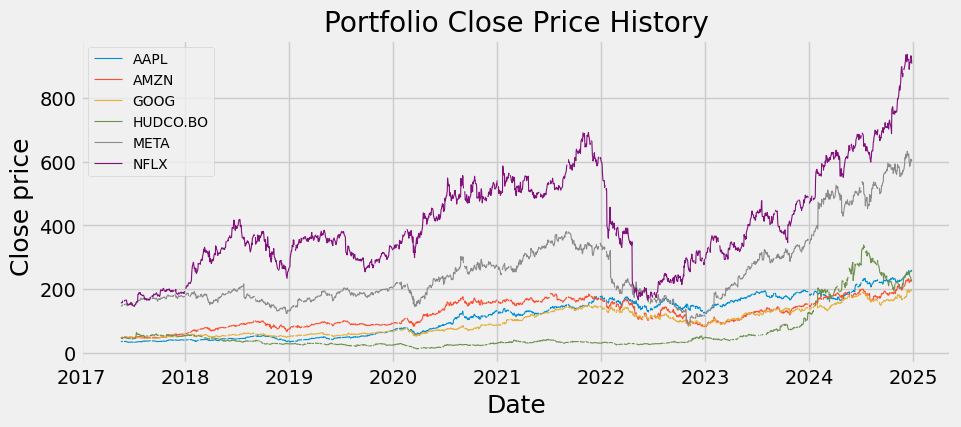

In [ ]:
showGraph(stocksymbols)

In [ ]:
## Let's calculate simple returns
daily_simple_returns=my_stocks.pct_change()
daily_simple_returns

<ipython-input-12-166f7f560031>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_simple_returns=my_stocks.pct_change()


Ticker,AAPL,AMZN,GOOG,HUDCO.BO,META,NFLX
Date,,,,,,
2017-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,0.006076,0.011283,0.008405,-0.032414,0.001216,0.000892
2017-05-23,-0.001233,0.000896,0.007390,-0.028511,-0.001147,0.005027
2017-05-24,-0.002991,0.009068,0.006471,-0.022010,0.013304,-0.001266
2017-05-25,0.003456,0.013291,0.015268,0.060765,0.012797,0.033597
...,...,...,...,...,...,...
2024-12-20,0.018816,0.007300,0.017185,-0.011027,-0.017328,0.007771
2024-12-23,0.003065,0.000622,0.015703,-0.021887,0.024947,0.002640
2024-12-24,0.011478,0.017729,0.008062,-0.018999,0.013170,0.022678


In [ ]:
## Stock Correlations
daily_simple_returns.corr()

Ticker,AAPL,AMZN,GOOG,HUDCO.BO,META,NFLX
Ticker,,,,,,
AAPL,1.000000,0.596747,0.640763,0.078679,0.539504,0.460479
AMZN,0.596747,1.000000,0.661543,0.058191,0.604913,0.562498
GOOG,0.640763,0.661543,1.000000,0.114016,0.635797,0.478463
HUDCO.BO,0.078679,0.058191,0.114016,1.000000,0.056652,0.032510
META,0.539504,0.604913,0.635797,0.056652,1.000000,0.484834
NFLX,0.460479,0.562498,0.478463,0.032510,0.484834,1.000000


In [ ]:
##Stock Co-variance
daily_simple_returns.cov()

Ticker,AAPL,AMZN,GOOG,HUDCO.BO,META,NFLX
Ticker,,,,,,
AAPL,0.000342,0.000231,0.000220,0.000040,0.000251,0.000229
AMZN,0.000231,0.000438,0.000257,0.000034,0.000319,0.000317
GOOG,0.000220,0.000257,0.000344,0.000058,0.000297,0.000239
HUDCO.BO,0.000040,0.000034,0.000058,0.000766,0.000039,0.000024
META,0.000251,0.000319,0.000297,0.000039,0.000634,0.000329
NFLX,0.000229,0.000317,0.000239,0.000024,0.000329,0.000724


<Axes: xlabel='Ticker'>

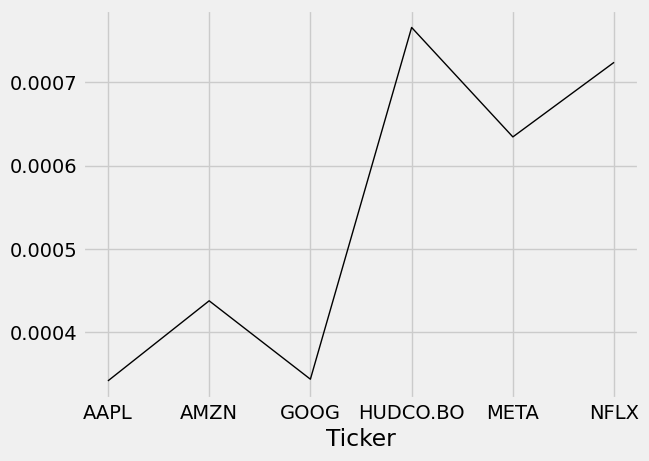

In [ ]:
daily_simple_returns.var().plot(lw=1,color="black")

In [ ]:
##Variances
daily_simple_returns.var()

,0
Ticker,
AAPL,0.000342
AMZN,0.000438
GOOG,0.000344
HUDCO.BO,0.000766
META,0.000634
NFLX,0.000724


##*Stock Volatility -- standard deviations of daily simple returns*

In [ ]:
print("the_stock_volatility")
daily_simple_returns.std()


the_stock_volatility


,0
Ticker,
AAPL,0.018485
AMZN,0.020924
GOOG,0.018540
HUDCO.BO,0.027672
META,0.025188
NFLX,0.026906


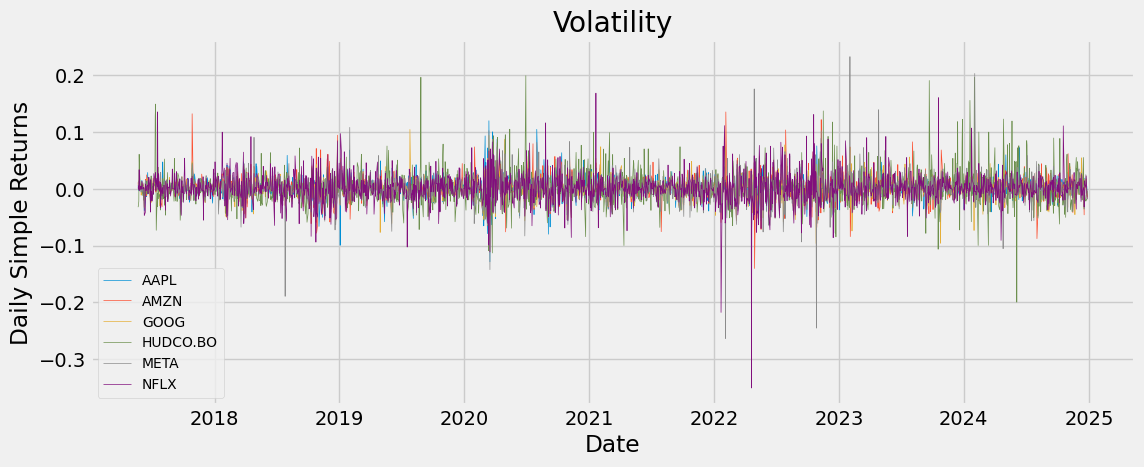

In [ ]:
##Visualize the volatility
plt.figure(figsize=(12,4.5))
for c in my_stocks.columns.values:
  plt.plot(daily_simple_returns[c],label=c,lw=0.5)
plt.legend(loc="lower left",fontsize=10)
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.title("Volatility")
plt.show()


In [ ]:
## To get a more concrete view we are calculating the mean of daily simple returns
print("Mean of Daily Simple Returns:")
daily_simple_returns.mean().sort_values(ascending=False)

Mean of Daily Simple Returns:


,0
Ticker,
NFLX,0.001262
AAPL,0.001170
HUDCO.BO,0.001166
META,0.001034
AMZN,0.001001
GOOG,0.000897


### **Netflix** is giving *higher* mean daily returns and **Google** is giving the *lowest*


In [ ]:
random_weights=np.array([0.3,0.2,0.15,0.15,0.1,0.1])
portfolioSimpleReturns=np.sum(random_weights*daily_simple_returns.mean())
print("Daily Expected Portfolio Return is: ",portfolioSimpleReturns)

Daily Expected Portfolio Return is:  0.0010903865114295838


Random weights is assigned as per the assumption that an individual invest **30% in NFLX**, **20% in HUDCO B.O**, **15% in Apple**, **15% in Meta**, **10% in AMZN** and **10% in GOOG**.

In [ ]:
Annual_expected_portfolio_return=portfolioSimpleReturns*244
print("Annual Expected Portfolio Return is: ",Annual_expected_portfolio_return)

Annual Expected Portfolio Return is:  0.26605430878881847


As in 2025 total weekends are **104** and thre are also **17** holidays . So total 121 off days (365-121=244)

In [ ]:
amt=float(input())
total_return= amt*(1+Annual_expected_portfolio_return)
total_return

500000


633027.1543944093